## Calculando los retornos historicos del S&P500

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Definimos los parametros basicos
tickers = ['^GSPC','^SP500TR']
start_date = '2014-12-31'
end_date = '2025-04-18'

In [3]:
df_aapl=yf.download('AAPL', start=start_date, end=end_date,auto_adjust=False)
df_aapl

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2014-12-31,24.554010,27.594999,28.282499,27.552500,28.205000,165613600
2015-01-02,24.320435,27.332500,27.860001,26.837500,27.847500,212818400
2015-01-05,23.635292,26.562500,27.162500,26.352501,27.072500,257142000
2015-01-06,23.637512,26.565001,26.857500,26.157499,26.635000,263188400
2015-01-07,23.968966,26.937500,27.049999,26.674999,26.799999,160423600
...,...,...,...,...,...,...
2025-04-11,198.149994,198.149994,199.539993,186.059998,186.100006,87435900
2025-04-14,202.520004,202.520004,212.940002,201.160004,211.440002,101352900


### Diferencia entre Close y Adj Close

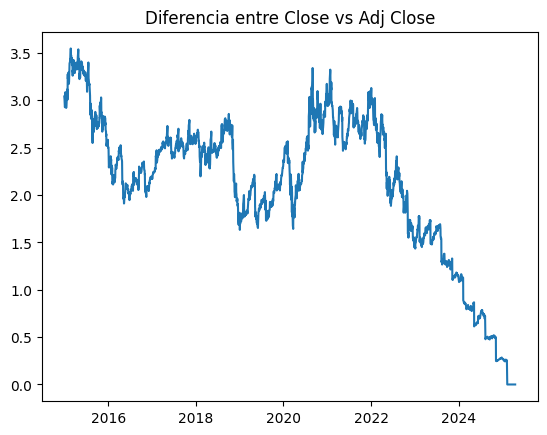

In [4]:
from datetime import date
plt.plot(df_aapl.index,df_aapl['Close']-df_aapl['Adj Close'])
plt.title('Diferencia entre Close vs Adj Close')
plt.show()

## Retorno Total Acumulado (proxi vs real)

In [5]:
df=yf.download(tickers, start=start_date, end=end_date,auto_adjust=False)['Adj Close']
df

[*********************100%***********************]  2 of 2 completed


Ticker,^GSPC,^SP500TR
Date,,
2014-12-31,2058.899902,3769.439941
2015-01-02,2058.199951,3768.679932
2015-01-05,2020.579956,3700.030029
2015-01-06,2002.609985,3667.139893
2015-01-07,2025.900024,3710.939941
...,...,...
2025-04-11,5363.359863,11818.530273
2025-04-14,5405.970215,11912.450195
2025-04-15,5396.629883,11892.990234


In [6]:
df['returns_^GSPC']=df['^GSPC'].pct_change()
df['returns_^SP500TR']=df['^SP500TR'].pct_change()
df

Ticker,^GSPC,^SP500TR,returns_^GSPC,returns_^SP500TR
Date,,,,
2014-12-31,2058.899902,3769.439941,NaN,NaN
2015-01-02,2058.199951,3768.679932,-0.000340,-0.000202
2015-01-05,2020.579956,3700.030029,-0.018278,-0.018216
2015-01-06,2002.609985,3667.139893,-0.008893,-0.008889
2015-01-07,2025.900024,3710.939941,0.011630,0.011944
...,...,...,...,...
2025-04-11,5363.359863,11818.530273,0.018092,0.018117
2025-04-14,5405.970215,11912.450195,0.007945,0.007947
2025-04-15,5396.629883,11892.990234,-0.001728,-0.001634


In [7]:
df['Ret_Acum_cumsum_GSPC']=df['returns_^GSPC'].cumsum()
df['Ret_Acum_cumsum_SP500TR']=df['returns_^SP500TR'].cumsum()
df

Ticker,^GSPC,^SP500TR,returns_^GSPC,returns_^SP500TR,Ret_Acum_cumsum_GSPC,Ret_Acum_cumsum_SP500TR
Date,,,,,,
2014-12-31,2058.899902,3769.439941,NaN,NaN,NaN,NaN
2015-01-02,2058.199951,3768.679932,-0.000340,-0.000202,-0.000340,-0.000202
2015-01-05,2020.579956,3700.030029,-0.018278,-0.018216,-0.018618,-0.018418
2015-01-06,2002.609985,3667.139893,-0.008893,-0.008889,-0.027512,-0.027307
2015-01-07,2025.900024,3710.939941,0.011630,0.011944,-0.015882,-0.015363
...,...,...,...,...,...,...
2025-04-11,5363.359863,11818.530273,0.018092,0.018117,1.128327,1.313742
2025-04-14,5405.970215,11912.450195,0.007945,0.007947,1.136272,1.321689
2025-04-15,5396.629883,11892.990234,-0.001728,-0.001634,1.134544,1.320055


In [8]:
df['Ret_Acum_cumprod_GSPC']=((1+df['returns_^GSPC']).cumprod()-1)
df['Ret_Acum_cumprod_SP500TR']=((1+df['returns_^SP500TR']).cumprod()-1)
df

Ticker,^GSPC,^SP500TR,returns_^GSPC,returns_^SP500TR,Ret_Acum_cumsum_GSPC,Ret_Acum_cumsum_SP500TR,Ret_Acum_cumprod_GSPC,Ret_Acum_cumprod_SP500TR
Date,,,,,,,,
2014-12-31,2058.899902,3769.439941,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,2058.199951,3768.679932,-0.000340,-0.000202,-0.000340,-0.000202,-0.000340,-0.000202
2015-01-05,2020.579956,3700.030029,-0.018278,-0.018216,-0.018618,-0.018418,-0.018612,-0.018414
2015-01-06,2002.609985,3667.139893,-0.008893,-0.008889,-0.027512,-0.027307,-0.027340,-0.027139
2015-01-07,2025.900024,3710.939941,0.011630,0.011944,-0.015882,-0.015363,-0.016028,-0.015520
...,...,...,...,...,...,...,...,...
2025-04-11,5363.359863,11818.530273,0.018092,0.018117,1.128327,1.313742,1.604964,2.135354
2025-04-14,5405.970215,11912.450195,0.007945,0.007947,1.136272,1.321689,1.625660,2.160271
2025-04-15,5396.629883,11892.990234,-0.001728,-0.001634,1.134544,1.320055,1.621123,2.155108


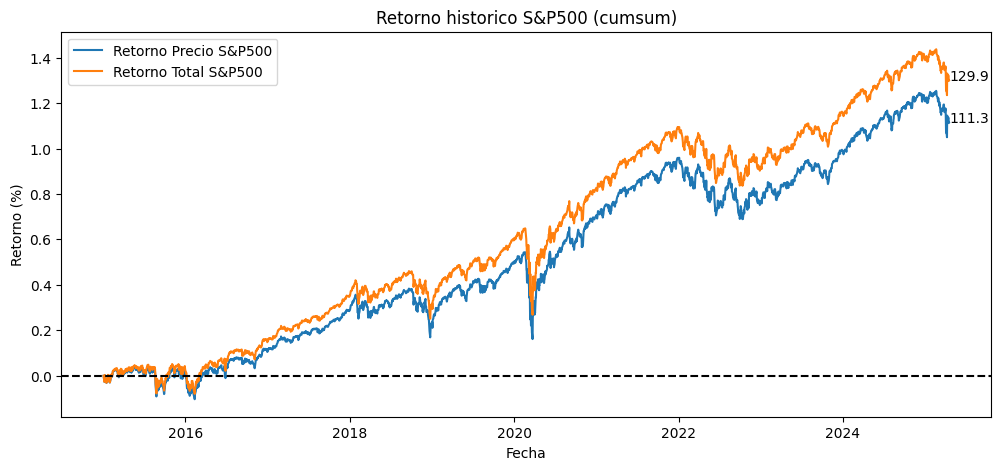

In [13]:
plt.figure(figsize=(12,5))
plt.plot(df.index,df['Ret_Acum_cumsum_GSPC'],label='Retorno Precio S&P500')
plt.text(df.index[-1],df['Ret_Acum_cumsum_GSPC'].iloc[-1],round(df['Ret_Acum_cumsum_GSPC'].iloc[-1]*100,1))
#plt.plot(df.index,df['Ret_Acum_cumprod_GSPC'],label='Retorno Precio S&P500')
#plt.text(df.index[-1],df['Ret_Acum_cumprod_GSPC'].iloc[-1],round(df['Ret_Acum_cumprod_GSPC'].iloc[-1]*100,1))
plt.plot(df.index,df['Ret_Acum_cumsum_SP500TR'],label='Retorno Total S&P500')
plt.text(df.index[-1],df['Ret_Acum_cumsum_SP500TR'].iloc[-1],round(df['Ret_Acum_cumsum_SP500TR'].iloc[-1]*100,1))
#plt.plot(df.index,df['Ret_Acum_cumprod_SP500TR'],label='Retorno Total S&P500')
#plt.text(df.index[-1],df['Ret_Acum_cumprod_SP500TR'].iloc[-1],round(df['Ret_Acum_cumprod_SP500TR'].iloc[-1]*100,1))
plt.xlabel('Fecha')
plt.ylabel('Retorno (%)')
plt.axhline(0,color='black',linestyle='--')
plt.title('Retorno historico S&P500 (cumsum)')
plt.legend()
plt.show()

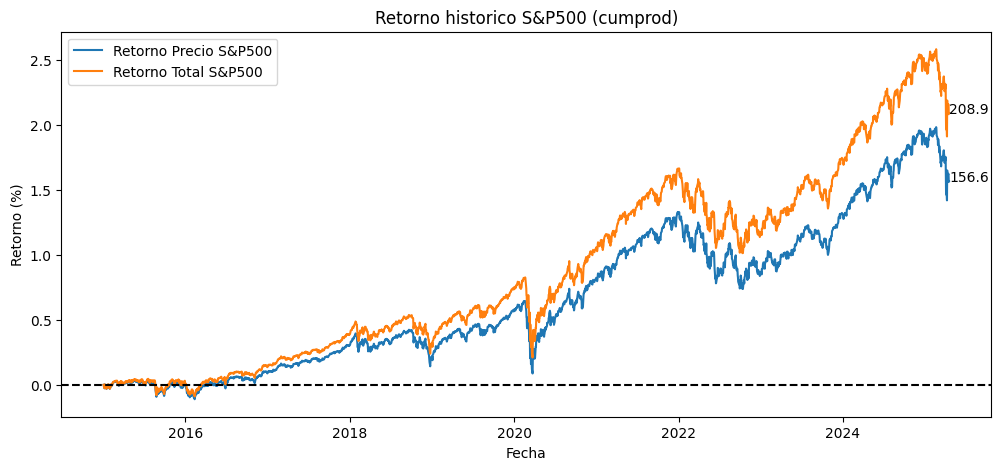

In [14]:
plt.figure(figsize=(12,5))
#plt.plot(df.index,df['Ret_Acum_cumsum_GSPC'],label='Retorno Precio S&P500')
#plt.text(df.index[-1],df['Ret_Acum_cumsum_GSPC'].iloc[-1],round(df['Ret_Acum_cumsum_GSPC'].iloc[-1]*100,1))
plt.plot(df.index,df['Ret_Acum_cumprod_GSPC'],label='Retorno Precio S&P500')
plt.text(df.index[-1],df['Ret_Acum_cumprod_GSPC'].iloc[-1],round(df['Ret_Acum_cumprod_GSPC'].iloc[-1]*100,1))
#plt.plot(df.index,df['Ret_Acum_cumsum_SP500TR'],label='Retorno Total S&P500')
#plt.text(df.index[-1],df['Ret_Acum_cumsum_SP500TR'].iloc[-1],round(df['Ret_Acum_cumsum_SP500TR'].iloc[-1]*100,1))
plt.plot(df.index,df['Ret_Acum_cumprod_SP500TR'],label='Retorno Total S&P500')
plt.text(df.index[-1],df['Ret_Acum_cumprod_SP500TR'].iloc[-1],round(df['Ret_Acum_cumprod_SP500TR'].iloc[-1]*100,1))
plt.xlabel('Fecha')
plt.ylabel('Retorno (%)')
plt.axhline(0,color='black',linestyle='--')
plt.title('Retorno historico S&P500 (cumprod)')
plt.legend()
plt.show()

In [24]:
# Cuadre de Rendimiento acumulado del periodo
print('Retorno acumulado S&P500',round((df['^GSPC'].iloc[-1]/df['^GSPC'].iloc[0]-1)*100,1),'%')
print('Retorno acumulado S&P500 TR',round((df['^SP500TR'].iloc[-1]/df['^SP500TR'].iloc[0]-1)*100,1),'%')

Retorno acumulado S&P500 156.6 %
Retorno acumulado S&P500 TR 208.9 %
